Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [1]:
# Make the necessary directories for Kaggle
!mkdir -p ~/.kaggle

# Copy the Kaggle API key to the appropriate directory
!cp kaggle.json ~/.kaggle/

In [2]:
# Import the necessary library for downloading the dataset
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
# Extracts the contents of a zip file to a specified directory.
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Process the input image and label (Normalize).
def process_data(image,label):
  image = tensorflow.cast(image/255,tensorflow.float32)
  return image,label

train_ds = train_ds.map(process_data)
val_ds = val_ds.map(process_data)

In [7]:
# create cnn model
model = Sequential()

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 128)    512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [9]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics="accuracy")

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 [==============================] - 144s 214ms/step - loss: 0.7896 - accuracy: 0.5680 - val_loss: 0.6470 - val_accuracy: 0.5930
Epoch 2/10
625/625 [==============================] - 135s 215ms/step - loss: 0.6153 - accuracy: 0.6572 - val_loss: 0.6667 - val_accuracy: 0.5954
Epoch 3/10
625/625 [==============================] - 133s 213ms/step - loss: 0.5374 - accuracy: 0.7364 - val_loss: 0.5002 - val_accuracy: 0.7532
Epoch 4/10
625/625 [==============================] - 134s 213ms/step - loss: 0.4670 - accuracy: 0.7800 - val_loss: 0.4904 - val_accuracy: 0.7554
Epoch 5/10
625/625 [==============================] - 134s 213ms/step - loss: 0.4073 - accuracy: 0.8201 - val_loss: 0.4819 - val_accuracy: 0.7822
Epoch 6/10
625/625 [==============================] - 133s 212ms/step - loss: 0.3190 - accuracy: 0.8638 - val_loss: 0.4813 - val_accuracy: 0.7818
Epoch 7/10
625/625 [==============================] - 133s 213ms/step - loss: 0.2309 - accuracy: 0.9091 - val_loss: 0.6204 -

In [11]:
import matplotlib.pyplot as plt

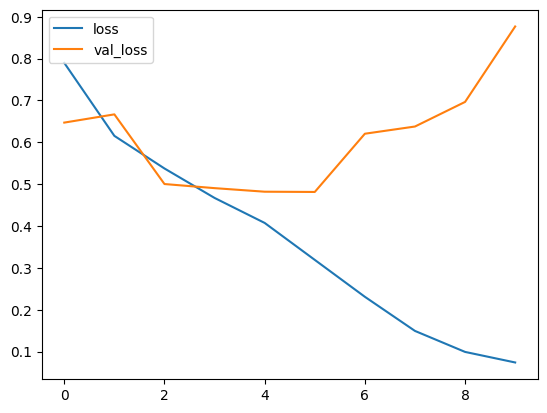

In [27]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()

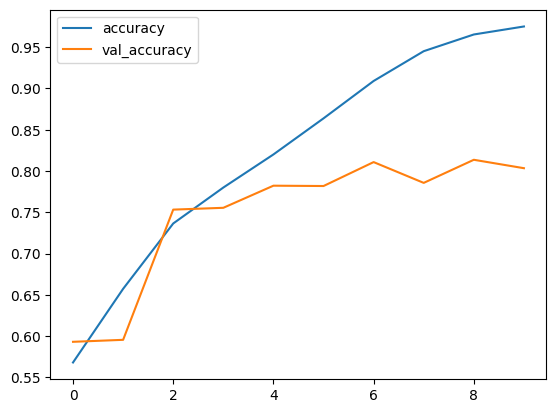

In [28]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [14]:
import cv2

In [15]:
test_img = cv2.imread("/content/cat.jpg")

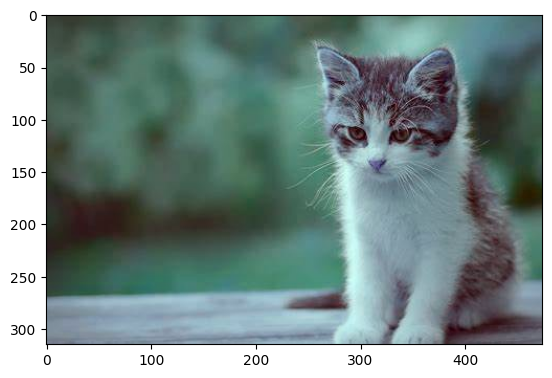

In [16]:
plt.imshow(test_img)

In [17]:
test_img.shape

(315, 474, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256))

In [19]:
test_input = test_img.reshape((1,256,256,3))

In [20]:
model.predict(test_input)

1/1 [==============================] - 0s 259ms/step


array([[0.]], dtype=float32)

dog

In [21]:
test_img = cv2.imread("/content/dog.jpg")

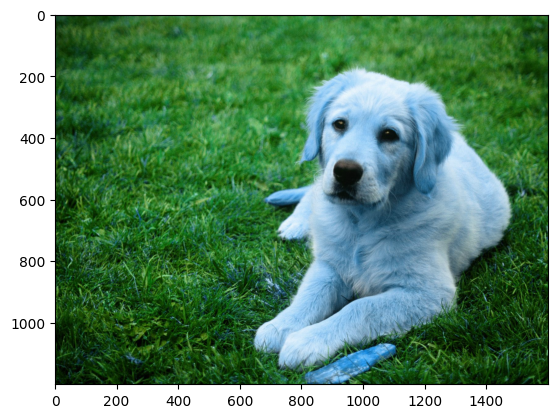

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(1200, 1600, 3)

In [24]:
test_img = cv2.resize(test_img,(256,256))

In [25]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
model.predict(test_input)

1/1 [==============================] - 0s 24ms/step


array([[1.]], dtype=float32)